HUB location Cluster using Kmeans and DBSCAN 

In [1]:
######importing libraries#######
from ast import literal_eval
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
 
dfSchool = pd.read_csv('school_profiles_with_lat_lng_hub.csv', engine='python')
#df=pd.read_csv('C:/WorkingFolder/DatathonCommunityHub/school_profiles_with_lat_lng_hub.csv')
dfSchool.head(3)

,Calendar Year,AGE ID,School Name,Suburb,State,Postcode,School Sector,School Type,Campus Type,Rolled Reporting Description,...,Full Time Equivalent Non-Teaching Staff,Total Enrolments,Girls Enrolments,Boys Enrolments,Full Time Equivalent Enrolments,Indigenous Enrolments (%),Language Background Other Than English (%),Address,Longitudes,Lattitudes
0,2008,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,Individual Reporting,...,6.9,410.0,185.0,225.0,410.0,1.0,4.0,"Corpus Christi Catholic School, Bellerive, TAS...",147.372269,-42.8709658
1,2008,4.0,Fahan School,Sandy Bay,TAS,7005,Independent,Combined,School Single Entity,Individual Reporting,...,14.6,347.0,339.0,8.0,347.0,1.0,1.0,"Fahan School, Sandy Bay, TAS, 7005",147.352238,-42.915853
2,2008,5.0,Geneva Christian College,Latrobe,TAS,7307,Independent,Combined,School Single Entity,Individual Reporting,...,5.0,76.0,43.0,33.0,75.4,7.0,0.0,"Geneva Christian College, Latrobe, TAS, 7307",146.438394,-41.226756


In [2]:
#for index, row in df.iterrows():      
 #   latitudeJsonString = row['Latitude']
  #  if not latitudeJsonString is None:
   #     latitudeJson = literal_eval(latitudeJsonString)
    #    print latitudeJson['results'][0]['geometry']['location']['lat']
    #df.at[index, 'LatitudeNew'] = str(latitudeJson['results'][0]['geometry']['location']['lat'])
#df.head()

In [3]:
#create a set for model purpose
dfmodel = dfSchool[['Lattitudes','Longitudes']]


In [4]:
for Lattitudes in dfmodel.columns:
    dfmodel[Lattitudes] = pd.to_numeric(dfmodel[Lattitudes], errors='coerce')
#df.[Lattitudes]=to_numeric

C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
dfmodel.dtypes

Lattitudes    float64
Longitudes    float64
dtype: object

In [6]:
dfmodel.isnull().sum()
#dfkmean.isna().sum()


Lattitudes    259
Longitudes     10
dtype: int64

In [7]:
dfmodel = dfmodel[dfmodel['Longitudes'].notna()]
dfmodel = dfmodel[dfmodel['Lattitudes'].notna()]
dfmodel.isna().sum()

Lattitudes    0
Longitudes    0
dtype: int64

In [8]:
dfmodel.shape

(9276, 2)

In [9]:
##Removing negative value in longitute
dfmodel = dfmodel[dfmodel['Longitudes']>0]

In [10]:
####Assigning data to model frame and Applying ML on dataset
dfkmean=dfmodel

In [11]:
from sklearn import cluster 
import numpy as np
from sklearn import metrics
from scipy.spatial.distance import cdist

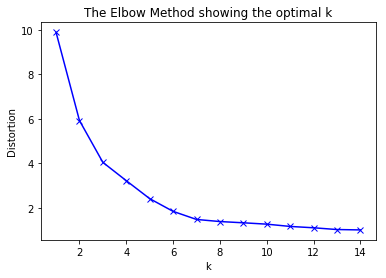

In [12]:
# k means determine k
distortions = []
K = range(1,15)
X=dfkmean
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
###Kmeans with 6
dfkmean = dfmodel
model = cluster.KMeans(n_clusters = 6, random_state=14)
fit = model.fit(dfkmean)
centroids=fit.cluster_centers_
clust_labels=fit.predict(dfkmean)
print (centroids)


[[-31.62374584 116.30213809]
 [-37.91472253 145.26603732]
 [-25.85804662 151.42262564]
 [-34.70731492 138.98805463]
 [-33.53714313 150.75782512]
 [-16.65691211 132.36993709]]


In [14]:
kmeansdata = pd.DataFrame(clust_labels)

In [15]:
kmeansdata.dtypes

0    int32
dtype: object

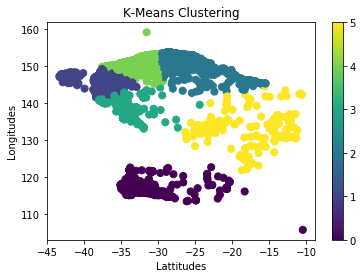

In [16]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(dfkmean['Lattitudes'],dfkmean['Longitudes'],
                     c=kmeansdata[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Lattitudes')
ax.set_ylabel('Longitudes')
plt.colorbar(scatter)

In [17]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [18]:
dfdbscan = dfmodel

In [19]:
dbScanmodel = DBSCAN(eps=2, min_samples=5).fit(dfdbscan)

In [20]:
labels = dbScanmodel.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbScanmodel.core_sample_indices_] = True

Text(0.5, 1.0, 'DBSCAN')

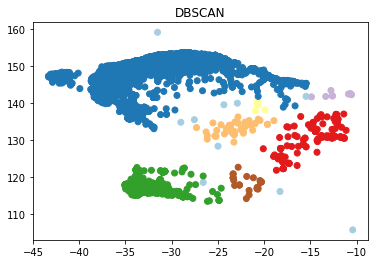

In [21]:
#Plotting DBscan results
y_pred = dbScanmodel.fit_predict(dfdbscan)
plt.scatter(dfdbscan['Lattitudes'], dfdbscan['Longitudes'],c=y_pred, cmap='Paired')
plt.title("DBSCAN")